## Project Description

The goal of this project is to create a model that predicts the length-of-stay for each patient at time of admission. The inputs to the prediction model would include features such as patient’s diagnosis category (e.g. heart disease, delivery, injury/poisoning, etc.), age, gender, marital status, and race.

## Metrics Evaluation

The expected outcome is to develop a model that will be better at predicting hospital LOS(Length of Stay) than the industry standards of median and average LOS. The median LOS is simply the median LOS of past admissions to a hospital. Similarly, a second commonly used metric in healthcare is the average, or mean LOS. To measure performance, we will compare the prediction model against the median and average LOS using the root-mean-square error (RMSE). The RMSE is a commonly used measure of the differences between values predicted by a model and the values observed, where a lower score implies better accuracy. For example, a perfect prediction model would have an RMSE of 0. The RMSE equation for this work is given as follows, where (n) is the number of hospital admission records, ($\hat{y}$) the prediction LOS, and (y) is the actual LOS.


## Data Loading

In [ ]:
#mounting the drive
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
#dataframe 
import pandas as pd
import numpy as np
import csv

#viz lib
import matplotlib.pyplot as plt
import seaborn as sns

#model and metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Read the data into dataframe
with open('/gdrive/My Drive/los_kensci_datascience_task.csv') as f:
  data = pd.read_csv(f)

## Data Exploration and Feature Engineering

In [ ]:
#Description of the columns 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounterID,32000,NaN,NaN,NaN,150077,28861.2,100006,125069,150162,175065,199999
age,32000,NaN,NaN,NaN,61.8694,16.6388,14,51,64,75,89
edVisitCountPast3months,32000,NaN,NaN,NaN,0.103594,0.375322,0,0,0,0,6
admissionMonth,32000,NaN,NaN,NaN,6.53422,3.43751,1,4,7,9,12
admissionBetweenThuAndSat,32000,NaN,NaN,NaN,0.405438,0.490984,0,0,0,1,1
edTimeBeforeAdmission,19128,NaN,NaN,NaN,0.236457,0.26725,-28.99,0.14,0.2,0.29,2.94
firstTemperatureReadingInED,4675,NaN,NaN,NaN,37.0997,7.43738,0.1,35.7,36.4,37.1,101.3
meanLOSPast24months,6104,NaN,NaN,NaN,11.6369,11.7896,0.06,4.95,8.01,14.2,173.74
inpatientAdmitCountPast3months,32000,NaN,NaN,NaN,0.0109375,0.10461,0,0,0,0,2
meanTemperaturePast12months,687,NaN,NaN,NaN,37.375,2.58162,34.19,36.69,37.09,37.5,67.4


In [ ]:
data.info(verbose=1)

In [ ]:
# Convert bool columns to int
col_bool = list(set(data.columns)-set(data.describe().columns))
data[col_bool] *= 1

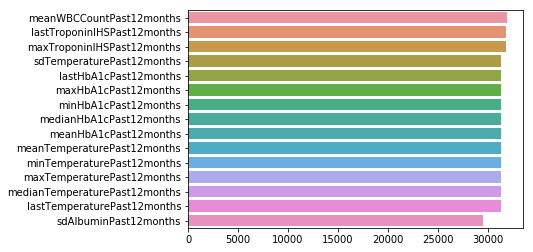

In [ ]:
# missing values 
missing = data.isna().sum().sort_values(ascending=False)
sns.barplot(missing[:15],missing[:15].index)
plt.show()

In [ ]:
#remove missing values
#missing_df = missing.reset_index().rename(columns={"index": "col_name", 0: "missing_count_values"})
# df = data[(list(missing_df[missing_df.missing_count_values < missing_df.missing_count_values.mean()]['col_name']))]


In [ ]:
df = data.copy()

In [ ]:
# Drop Length Of Stay < 0 
df = df[df['actualLOS'] > 0]

In [ ]:
df['actualLOS'].describe()

count    31984.000000
mean         3.358689
std          3.457656
min          0.010000
25%          1.180000
50%          2.070000
75%          3.970000
max         19.960000
Name: actualLOS, dtype: float64

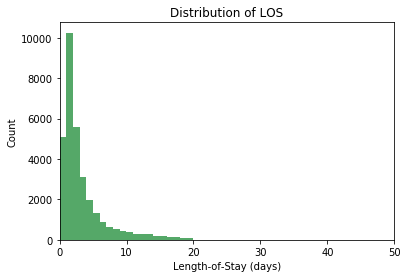

In [ ]:
plt.hist(df['actualLOS'], bins=20, color = '#55a868')
plt.xlim(0, 50)
plt.title('Distribution of LOS')
plt.ylabel('Count')
plt.xlabel('Length-of-Stay (days)')
plt.tick_params(top=False, right=False) 
plt.show();

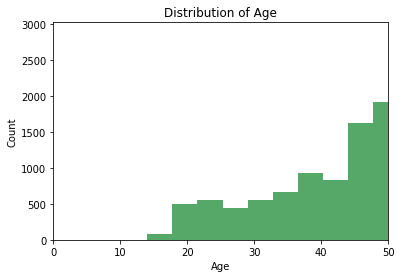

In [ ]:
plt.hist(df['age'], bins=20, color = '#55a868')
plt.xlim(0, 50)
plt.title('Distribution of Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.tick_params(top=False, right=False) 
plt.show();

In [ ]:
def plot_los_groupby(variable, size):
    ''' 
    Plot Median LOS by df categorical series name 
    '''
    results = df[[variable,'actualLOS']].groupby(variable).median().reset_index()
    values = list(results['actualLOS'].values)
    labels = list(results[variable].values)

    fig, ax = plt.subplots(figsize=size)
    ind = range(len(results))
    ax.barh(ind, values, align='center', height=0.6, color = '#55a868', alpha=0.8)
    ax.set_yticks(ind)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Median Length of Stay (days)')
    ax.tick_params(left=False, top=False, right=False) 
    ax.set_title('Comparison of {} labels'.format(variable))
    
    plt.tight_layout()
    plt.show();

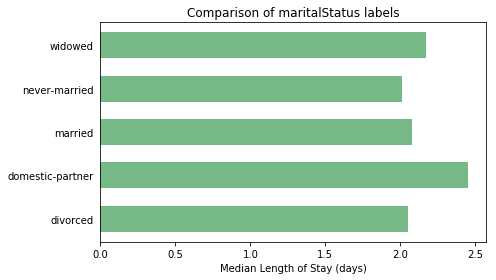

In [ ]:
plot_los_groupby('maritalStatus',(7,4))

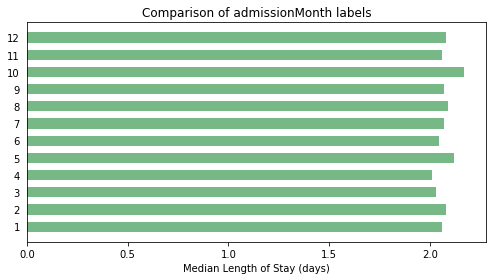

In [ ]:
plot_los_groupby('admissionMonth' ,(7,4))

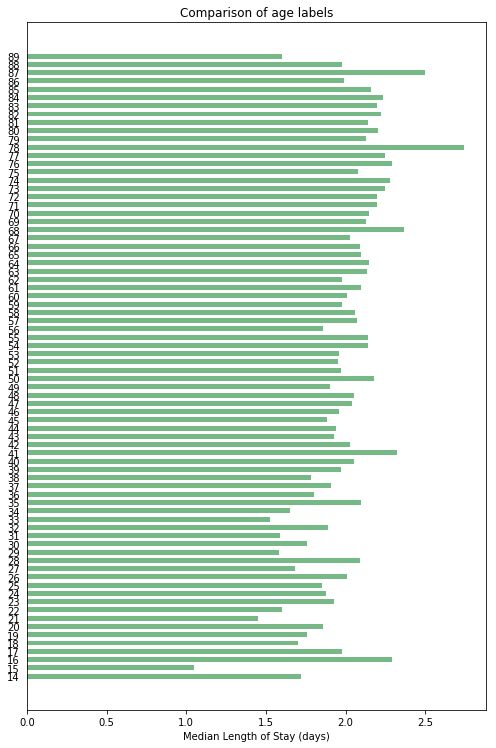

In [ ]:
plot_los_groupby('age',(7,10.5))

In [ ]:
# Gender 
print('---Gender--')
print('No of male: {} '.format(data[data.issexMale==1].shape[0]))
print('No of Female: {}'.format(data[data.issexFemale==1].shape[0]))

#Ethnicity
print('\n\n---Ethnicity---\n')
print ('No of Whites : {}'.format(data[data.isethnicityWhite == 1].shape[0]))
print ('No of BlackOrAfricanAmerican: {}'.format(data[data.isethnicityBlackOrAfricanAmerican ==1].shape[0]))
print ('No of HispanicOrLatino: {}'.format(data[data.isethnicityHispanicOrLatino==1].shape[0]))
print ('No of Asians: {}'.format(data[data.isethnicityAsian ==1].shape[0]))


---Gender--
No of male: 18300 
No of Female: 13700


---Ethnicity---

No of Whites : 22560
No of BlackOrAfricanAmerican: 2868
No of HispanicOrLatino: 908
No of Asians: 470


In [ ]:
# Fill missing values
df[['isFirstRespirationInEDLess8OrGreater24',      
'isFirstDiastolicBPInEDLess90OrGreater180',
'isFirstOxygenSaturationInEDLess88',
'isFirstSystolicBPInEDLess90OrGreater180',
'isFirstArterialPressureInEDLess60OrGreater120',
'isFirstHeartRateInEDLess60OrGreater110',
'ismaritalStatusDivorced',
'ismaritalStatusMarried',
'ismaritalStatusNeverMarried',
'ismaritalStatusWidowed'
]] = df[['isFirstRespirationInEDLess8OrGreater24',      
'isFirstDiastolicBPInEDLess90OrGreater180',
'isFirstOxygenSaturationInEDLess88',
'isFirstSystolicBPInEDLess90OrGreater180',
'isFirstArterialPressureInEDLess60OrGreater120',
'isFirstHeartRateInEDLess60OrGreater110',
'ismaritalStatusDivorced',
'ismaritalStatusMarried',
'ismaritalStatusNeverMarried',
'ismaritalStatusWidowed'
]].fillna(value=0)

df[['bmi',                                      
'firstRespirationReadingInED',                       
'firstDiastolicBPReadingInED' ,                    
'firstOxygenSaturationReadingInED',                  
'firstSystolicBPReadingInED',                        
'firstArterialPressureReadingInED',               
'firstHeartRateReadingInED']] = df[['bmi',                                      
'firstRespirationReadingInED',                       
'firstDiastolicBPReadingInED' ,                    
'firstOxygenSaturationReadingInED',                  
'firstSystolicBPReadingInED',                        
'firstArterialPressureReadingInED',               
'firstHeartRateReadingInED']].fillna(value=0.0)
df["maritalStatus"].fillna('unknown(default)', inplace = True)
df.fillna(value=0.0,inplace=True)
 

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31984 entries, 0 to 31999
Data columns (total 218 columns):
encounterID                                      int64
age                                              int64
edVisitCountPast3months                          int64
admissionMonth                                   int64
admissionBetweenThuAndSat                        int64
edTimeBeforeAdmission                            float64
firstTemperatureReadingInED                      float64
meanLOSPast24months                              float64
inpatientAdmitCountPast3months                   int64
meanTemperaturePast12months                      float64
inpatientAdmitCountPast6months                   int64
inpatientAdmitCountPast12months                  int64
hospitalAdmitCountPast3months                    int64
hospitalAdmitCountPast6months                    int64
edVisitCountPast6months                          int64
medianTemperaturePast12months                    float64


In [ ]:
#Check missing values
df.isnull().values.sum()

0

## Modelling


In [ ]:
# Target Variable (Length-of-Stay)
LOS = df['actualLOS'].values
# Prediction Features
features = df.drop(columns=['actualLOS','maritalStatus','encounterID','adjustedLOS'])

In [ ]:
# Spliting the data into 80(training)-20(testing)
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    LOS, 
                                                    test_size = .20, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 25587 samples.
Testing set has 6397 samples.


In [ ]:
# Regression models for comparison
models = [
          GradientBoostingRegressor(random_state = 0), 
          LinearRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(random_state = 0)]

results = {}

for model in models:
    
    # Instantiate and fit Regressor Model
    reg_model = model
    reg_model.fit(X_train, y_train)
    
    # Make predictions with model
    y_test_preds = reg_model.predict(X_test)
    
    # Grab model name and store results associated with model
    name = str(model).split("(")[0]

    results[name] = r2_score(y_test, y_test_preds)
    print('{} done.'.format(name))

GradientBoostingRegressor done.
LinearRegression done.
KNeighborsRegressor done.
RandomForestRegressor done.


Text(0.5,1,'Comparison of Regression Models')

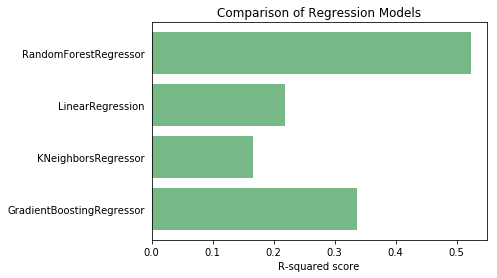

In [ ]:
fig, ax = plt.subplots()
ind = range(len(results))
ax.barh(ind, list(results.values()), align='center', 
        color = '#55a868', alpha=0.8)
ax.set_yticks(ind)
ax.set_yticklabels(results.keys())
ax.set_xlabel('R-squared score')
ax.tick_params(left=False, top=False, right=False) 
ax.set_title('Comparison of Regression Models')


In [ ]:
results

{'GradientBoostingRegressor': 0.33616676786323707,
 'KNeighborsRegressor': 0.16524795857749952,
 'LinearRegression': 0.21893312202019322,
 'RandomForestRegressor': 0.5226970222775045}

The RandomForestRegressor took the win with an R2 score of ~52%.

In [ ]:
reg_model = RandomForestRegressor(random_state=0)   
reg_model.fit(X_train, y_train)
y_test_preds = reg_model.predict(X_test)
r2_not_refined = r2_score(y_test, y_test_preds)
print("R2 score is: {:2f}".format(r2_not_refined))


R2 score is: 0.522697


##Results

The most important features of the model when using the Random Forest Regressor.

In [ ]:
feature_imp = pd.DataFrame(reg_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_imp.head(20)

,importance
proceduresCount,0.234647
cciWeight,0.079289
magnitude,0.051956
bmi,0.042295
age,0.042112
firstHeartRateReadingInED,0.038834
edTimeBeforeAdmission,0.037494
firstRespirationReadingInED,0.035224
firstDiastolicBPReadingInED,0.034928
firstSystolicBPReadingInED,0.034341


In [ ]:
feature_imp.index[0:10].tolist()

['proceduresCount',
 'cciWeight',
 'magnitude',
 'bmi',
 'age',
 'firstHeartRateReadingInED',
 'edTimeBeforeAdmission',
 'firstRespirationReadingInED',
 'firstDiastolicBPReadingInED',
 'firstSystolicBPReadingInED']

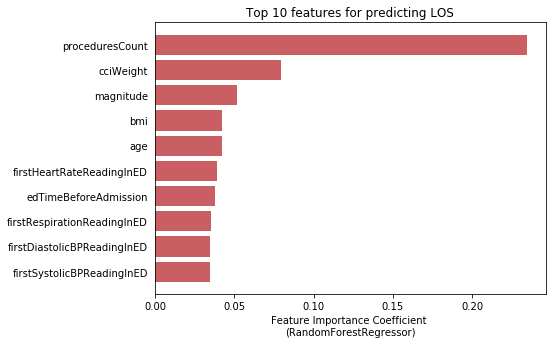

In [ ]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(7, 5))
ind = range(0,10)
ax.barh(ind, feature_imp['importance'].values[0:10], 
        align='center', color='#c44e52', alpha=0.9)
ax.set_yticks(ind)
ax.set_yticklabels(feature_imp.index[0:10].tolist())
ax.tick_params(left=False, top=False, right=False) 
ax.set_title("Top 10 features for predicting LOS")
ax.set_xlabel('Feature Importance Coefficient \n(RandomForestRegressor)')
plt.gca().invert_yaxis()

In [ ]:
actual_mean_los = df['actualLOS'].mean() 
actual_median_los = df['actualLOS'].median()     

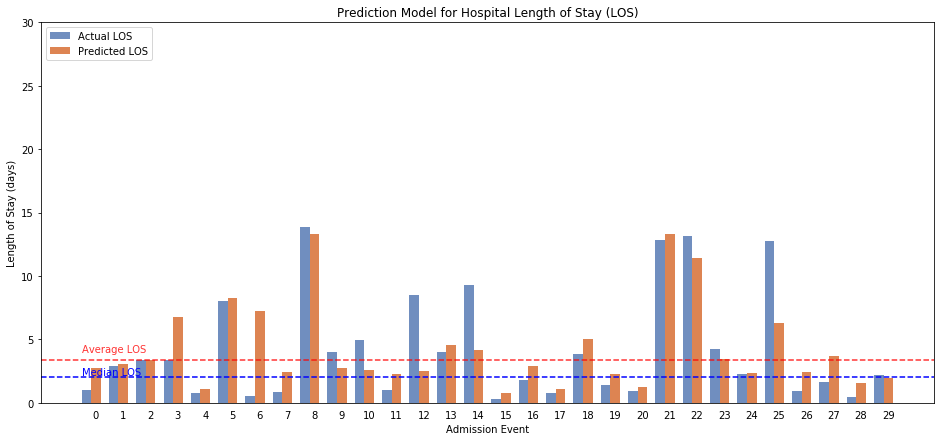

In [ ]:
fig, ax = plt.subplots(figsize=(16, 7))

ind = np.arange(0,30)
pad = 0.15
width = 0.35
set_actual = ax.bar(pad+ind, y_test[:30], width, color='#4c72b0', alpha=0.8)
set_predict = ax.bar(pad+ind+width, y_test_preds[:30], width, color='#dd8452')

ax.set_ylabel('Length of Stay (days)')
ax.set_xlabel('Admission Event')
ax.set_title('Prediction Model for Hospital Length of Stay (LOS)')
ax.text(0, 4, 'Average LOS', fontdict=None, withdash=False, color='red', alpha=0.8)
ax.text(0, 2.2, 'Median LOS', fontdict=None, withdash=False, color='blue')
ax.set_xticks(pad + ind + width)
ax.set_ylim(0, 30)
ax.set_xticklabels(list(range(30)))
ax.axhline(y=actual_median_los, xmin=0, xmax=20, ls='--', color='blue')
ax.axhline(y=actual_mean_los, xmin=0, xmax=20, ls='--', color='red', alpha=0.8)
ax.legend( (set_actual, set_predict), ('Actual LOS', 'Predicted LOS'), 
          loc='upper left')
ax.tick_params(bottom=False, top=False, right=False)

While the RMSE trend is promising, I also wanted to evaluate the model from a few other perspectives. The following figure takes the first 30 admissions from the test set and directly compares the actual, predicted (gradient boosting model), average, and median LOS values. This gives a more convoluted picture of the prediction model; in some admissions, it predicts well but not as well in others.

In [ ]:
ml_count, md_count, avg_count  = 0, 0, 0
ml_days, md_days, avg_days  = 0, 0, 0
ml_days_rms, md_days_rms, avg_days_rms  = 0, 0, 0

for i in range(y_test_preds.shape[0]):
    ml_model = abs(y_test_preds[i] - y_test[i])
    median_model = abs(actual_median_los - y_test[i])
    average_model = abs(actual_mean_los - y_test[i])
    
    ml_days += ml_model
    md_days += median_model
    avg_days += average_model
    
    ml_model_rms = (y_test_preds[i] - y_test[i])**2
    median_model_rms = (actual_median_los - y_test[i])**2
    average_model_rms = (actual_mean_los - y_test[i])**2
    
    ml_days_rms += ml_model_rms
    md_days_rms += median_model_rms
    avg_days_rms += average_model_rms

print("Prediction Model days {}".format(ml_days/y_test_preds.shape[0]))
print("Median Model days {}".format(md_days/y_test_preds.shape[0]))
print("Average Model days {}".format(avg_days/y_test_preds.shape[0]))

print("Prediction Model RMS {}".format((ml_days_rms**0.5)/y_test_preds.shape[0]))
print("Median Model RMS {}".format((md_days_rms**0.5)/y_test_preds.shape[0]))
print("Average Model RMS {}".format((avg_days_rms**0.5)/y_test_preds.shape[0]))

Prediction Model days 1.42132374551
Median Model days 2.10215882445
Average Model days 2.3911164325
Prediction Model RMS 0.0296867744508
Median Model RMS 0.0458386802961
Average Model RMS 0.0429703242187


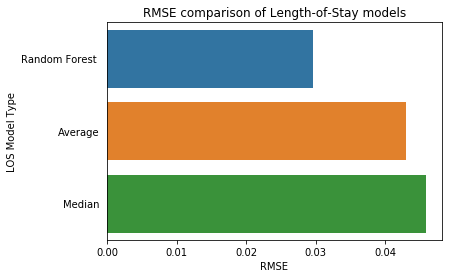

In [ ]:
#RMSE plot for writeup
data = pd.DataFrame({'RMSE': [(ml_days_rms**0.5)/y_test_preds.shape[0], 
                             (avg_days_rms**0.5)/y_test_preds.shape[0],
                             (md_days_rms**0.5)/y_test_preds.shape[0]],
                     'LOS Model Type': ['Random Forest ', 'Average', 'Median'] })

fig, ax = plt.subplots()
ax = sns.barplot(x='RMSE', y='LOS Model Type', data=data)
ax.set_title('RMSE comparison of Length-of-Stay models')
ax.tick_params(top=False, left=False, right=False)


The final way to look at the model was to plot the proportion of accurate predictions in the test set versus an allowed margin of error. Other studies qualify a LOS prediction as correct if it falls within a certain margin of error. It follows that as the margin of error allowance increases, so should the proportion of accurate predictions for all models. The random forest  prediction model performs better than the other constant models across the margin of error range up to 30%.